In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
f=[]
f.append(pd.read_csv('wolff_16.txt', sep=' ', header=0))
f.append(pd.read_csv('wolff_32.txt', sep=' ', header=0))
f.append(pd.read_csv('wolff_48.txt', sep=' ', header=0))
f.append(pd.read_csv('wolff_64.txt', sep=' ', header=0))
f.append(pd.read_csv('wolff_center_80.txt', sep=' ', header=0))
ferr=pd.read_csv('cluster_error(all).txt', sep=' ', header=0)
cases=len(f)

# I. Plotting with errorbars
I didn't draw magnetization errors because it was minor. (Almost didn't show up in the plot.)

In [22]:
ff=np.zeros((cases, 3,300))
fferr=np.zeros((cases, 3, 300))
index=np.arange(300)
for i in range (cases-1):
    for j in range (324, 624):
        ff[i][0][j-324]=np.average(f[i].temperature[j*5:j*5+5])
        ff[i][1][j-324]=np.average(f[i].m[j*5:j*5+5])
        ff[i][2][j-324]=np.average(f[i].mag_sus[j*5:j*5+5])
        fferr[i][1][j-324]=np.std(f[i].m[j*5:j*5+5])
        fferr[i][2][j-324]=np.std(f[i].mag_sus[j*5:j*5+5])
for j in range (100, 400):
    ff[4][0][j-100]=np.average(f[4].temperature[j*5:j*5+5])
    ff[4][1][j-100]=np.average(f[4].m[j*5:j*5+5])
    ff[4][2][j-100]=np.average(f[4].mag_sus[j*5:j*5+5])
    fferr[4][1][j-100]=np.std(f[4].m[j*5:j*5+5])
    fferr[4][2][j-100]=np.std(f[4].mag_sus[j*5:j*5+5])

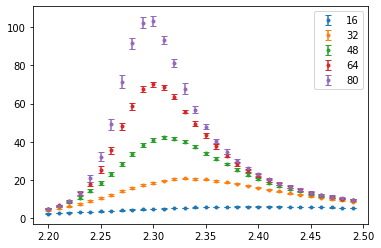

In [39]:
for i in range (cases-1):
    plt.errorbar(ff[i][0][index%10==0], ff[i][2][index%10==0], yerr=ferr.err_ms[0+300*i:300+300*i][index%10==0], 
                 marker=".", linestyle="", capsize=3, label=16*(1+i))
plt.errorbar(ff[4][0][index%10==0], ff[4][2][index%10==0], yerr=ferr.err_ms[0+300*4:300+300*4][index%10==0], 
                 marker=".", linestyle="", capsize=3, label=16*(1+4))
plt.legend()
plt.show()

### 1. Magnetization error comparison

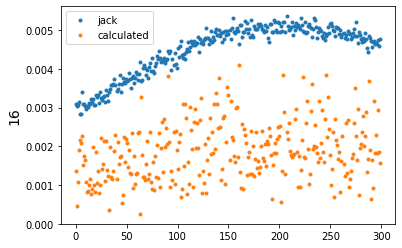

jack/calculated : 16 = 2.8473825753543056


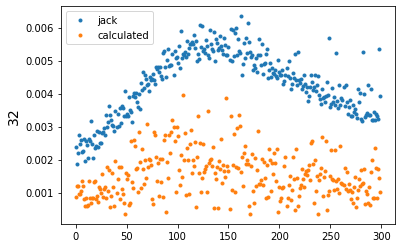

jack/calculated : 32 = 3.4025663694040422


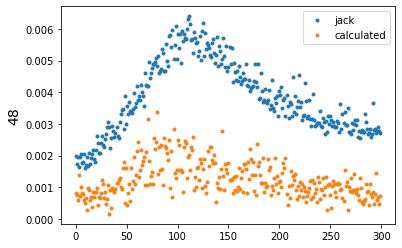

jack/calculated : 48 = 3.5790944744145183


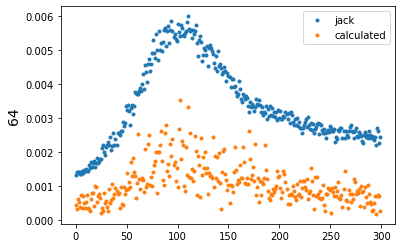

jack/calculated : 64 = 3.6299025205975126


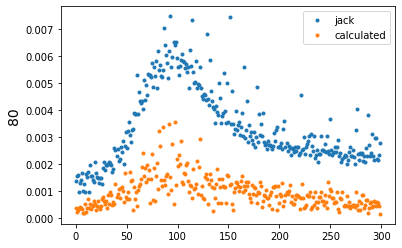

jack/calculated : 80 = 4.30381039468517


In [24]:
y=np.zeros(300)
for i in range (cases):
    plt.plot(index, ferr.err_m[300*i:300*i+300], '.', label='jack')
    plt.plot(index, fferr[i][1], '.', label='calculated')
    plt.ylabel(16*(1+i), fontsize=14)
    y=(ferr.err_m[300*i:300*i+300])/(fferr[i][1])
    plt.legend()
    plt.show()
    print('jack/calculated :', 16*(1+i), '=', np.average(y))

### 2. Magnetic susceptibility error comparison

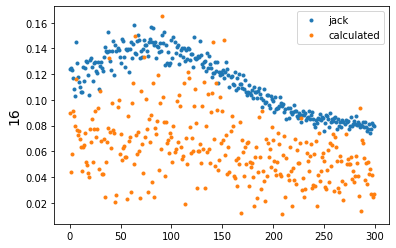

jack/calculated : 16 = 2.1656608582878265


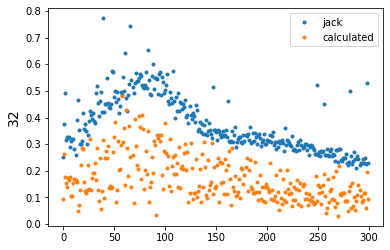

jack/calculated : 32 = 2.6319337481483673


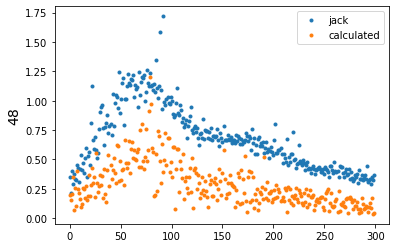

jack/calculated : 48 = 3.0467666061307415


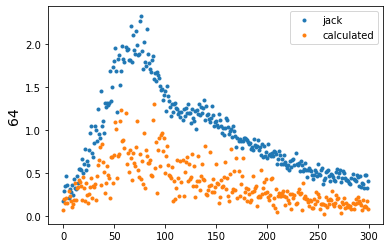

jack/calculated : 64 = 3.0402639974427945


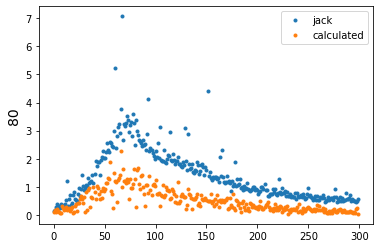

jack/calculated : 80 = 3.64775578975845


In [25]:
y=np.zeros(300)
for i in range (cases):
    plt.plot(index, ferr.err_ms[300*i:300*i+300], '.', label='jack')
    plt.plot(index, fferr[i][2], '.', label='calculated')
    plt.ylabel(16*(1+i), fontsize=14)
    y=(ferr.err_ms[300*i:300*i+300])/(fferr[i][2])
    plt.legend()
    plt.show()
    print('jack/calculated :', 16*(1+i), '=', np.average(y))

# II. Plotting magnetization & magnetic susceptibility
### 1. Magnetization

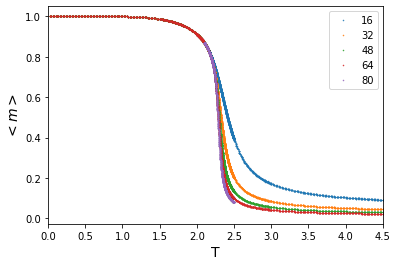

In [26]:
for i in range (cases):
    plt.plot(f[i].temperature, f[i].m, '.', markersize=1, label=16*(1+i))
plt.xlabel('T', fontsize=14)
plt.ylabel('$<m>$', fontsize=14)
plt.xlim(0, 4.5)
plt.legend()
plt.show()

### 2. magnetic susceptibility

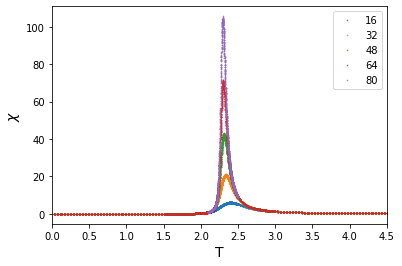

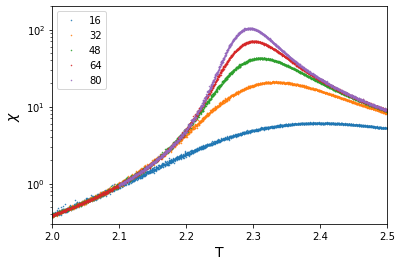

In [27]:
for i in range (cases):
    plt.plot(f[i].temperature, f[i].mag_sus, '.', markersize=1, label=16*(1+i))
plt.xlabel('T', fontsize=14)
plt.ylabel('$\chi$', fontsize=14)
plt.xlim(0, 4.5)
plt.legend()
plt.show()

for i in range (cases):
    plt.plot(f[i].temperature, f[i].mag_sus, '.', markersize=1, label=16*(1+i))
plt.xlim(2,2.5)
plt.ylim(0.3, 200)
plt.xlabel('T', fontsize=14)
plt.ylabel('$\chi$', fontsize=14)
plt.yscale('log')
plt.legend()
plt.show()

# III. Finite size scaling & Binder cumulent

maximum location = 1.9687049177749416


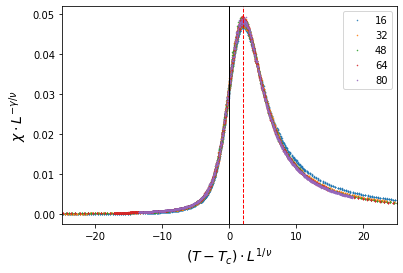

In [41]:
T_c=2/np.log(1+np.sqrt(2)) #critical temperature
nu = 1
gamma = 7/4

for i in range (cases):
    plt.plot((f[i].temperature-T_c)*(16*(1+i))**(1/nu), f[i].mag_sus*(16*(1+i))**(-gamma/nu), '.', markersize=1, label=16*(1+i))
a = 0
for i in range (cases):
    a = a + ((f[i].temperature-T_c)*(16*(1+i))**(1/nu))[np.argmax(f[i].mag_sus*16**(-gamma/nu))]
a /=cases
print("maximum location =", a)
plt.xlim(-25, 25)
plt.xlabel('$(T-T_c)\cdot L^{1/\\nu}$', fontsize=14)
plt.ylabel('$\chi\cdot L^{-\gamma/\\nu}$', fontsize=14)
plt.axvline(x=0, color='k', linewidth=1)
plt.axvline(x=a, color='r', linestyle='--', linewidth=1)
plt.legend()
plt.show()

### Binder cumulant

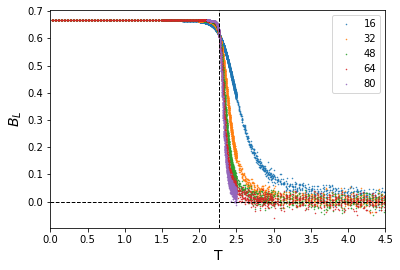

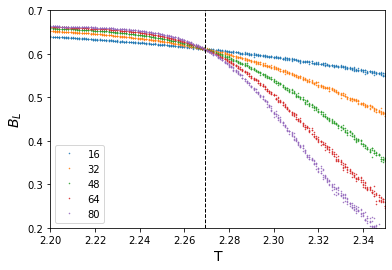

In [29]:
for i in range (cases):
    plt.plot(f[i].temperature, 1-f[i].m4/(3*f[i].m2**2), '.', markersize=1, label=16*(1+i))
plt.axhline(y=0, color='k', linewidth=1, linestyle='--')
plt.axvline(x=T_c, color='k', linewidth=1, linestyle='--')
plt.xlim(0, 4.5)
plt.xlabel('T', fontsize=14)
plt.ylabel('$B_L$', fontsize=14)
plt.legend()
plt.show()

for i in range (cases):
    plt.plot(f[i].temperature, 1-f[i].m4/(3*f[i].m2**2), '.', markersize=1, label=16*(1+i))
plt.axhline(y=0, color='k', linewidth=1, linestyle='--')
plt.xlim(2.2, 2.35)
plt.ylim(0.2, 0.7)
plt.axvline(x=T_c, color='k', linewidth=1, linestyle='--')
plt.xlabel('T', fontsize=14)
plt.ylabel('$B_L$', fontsize=14)
plt.legend()
plt.show()

### Scaling

In [30]:
points = 5
maxpoint=np.zeros((cases, points))
pseudopoint=np.zeros(cases)
maxerr=np.zeros(cases)
for j in range (cases):
    for i in range (points):
        maxpoint[j][i]=f[j].temperature[f[j].mag_sus==sorted(f[j].mag_sus, reverse=True)[i]]
    pseudopoint[j]=np.average(maxpoint[j])
    maxerr[j]=np.std(maxpoint[j])

all: y = 2.053837381203793 x + 2.2682600580781407
-1 : y = 2.0590522088353223 x + 2.26816171352075
-2 : y = 1.430204081632638 x + 2.2779265306122443


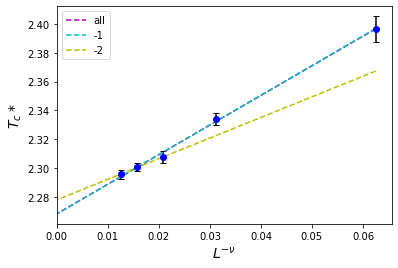

In [31]:
t = [1/(16*(1+v)) for v in range (cases)]
t.append(0)
z0 = np.polyfit(t[:cases], pseudopoint, 1) #all
z1 = np.polyfit(t[1:cases], pseudopoint[1:], 1) #exclude 16
z2 = np.polyfit(t[2:cases], pseudopoint[2:], 1) #exclude 32
p0 = np.poly1d(z0)
p1 = np.poly1d(z1)
p2 = np.poly1d(z2)
print("all: y =", z0[0], "x +", z0[1])
print("-1 : y =", z1[0], "x +", z1[1])
print("-2 : y =", z2[0], "x +", z2[1])
plt.errorbar(t[:cases], pseudopoint, yerr=maxerr, fmt="bo", linestyle="", ecolor='k', capsize=3)
plt.plot(t,p0(t),"m--", label='all')
plt.plot(t,p1(t),"c--", label='-1')
plt.plot(t,p2(t),"y--", label='-2')
plt.xlabel('$L^{-\\nu}$', fontsize=14)
plt.ylabel('$T_c*$', fontsize=14)
plt.xlim(0)
plt.legend()
plt.show()

In [32]:
T_c_max = np.zeros((2**cases, cases))
zz=[]
T_c_range = np.zeros(2**cases)
for i in range (2**cases):
    for j in range (cases):
        det = int(i/(2**j))%2
        T_c_max[i][j]=pseudopoint[j]+maxerr[j]*((-1)**det)
    zz.append(np.polyfit(t[:cases], T_c_max[i], 1))
    T_c_range[i] = zz[i][1]

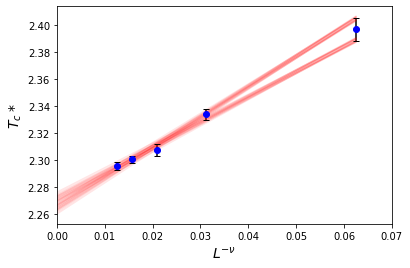

In [36]:
for i in range (2**cases):
    plt.plot(t, np.poly1d(zz[i])(t), 'r-', alpha=0.1)
plt.errorbar(t[:cases], pseudopoint, yerr=maxerr, fmt="bo", linestyle="", ecolor='k', capsize=3)
plt.xlabel('$L^{-\\nu}$', fontsize=14)
plt.ylabel('$T_c*$', fontsize=14)
plt.xlim(0, 0.07)
plt.show()

T_c = 2.2682600580781407 +/- 0.004183748218944384


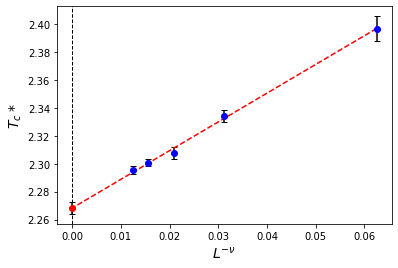

In [37]:
print("T_c =", np.average(T_c_range), "+/-", np.std(T_c_range))
plt.errorbar(t[:cases], pseudopoint, yerr=maxerr, fmt="bo", linestyle="", ecolor='k', capsize=3)
plt.errorbar(0, np.average(T_c_range), yerr=np.std(T_c_range), fmt="ro", linestyle="", ecolor='k', capsize=3)
plt.plot(t,p0(t),"r--")
plt.xlabel('$L^{-\\nu}$', fontsize=14)
plt.ylabel('$T_c*$', fontsize=14)
plt.axvline(x=0, color='k', linestyle='--', linewidth=1)
plt.show()

# +Additional: plot metropolis error

In [17]:
g=[]
g.append(pd.read_csv('met_center_16.txt', sep=' ', header=0))
g.append(pd.read_csv('met_center_32.txt', sep=' ', header=0))
#g.append(pd.read_csv('met_center48.txt', sep=' ', header=0))
#f.append(pd.read_csv('wolff_64.txt', sep=' ', header=0))
#f.append(pd.read_csv('wolff_center_80.txt', sep=' ', header=0))
gerr=pd.read_csv('met_error.txt', sep=' ', header=0)
cases=len(g)

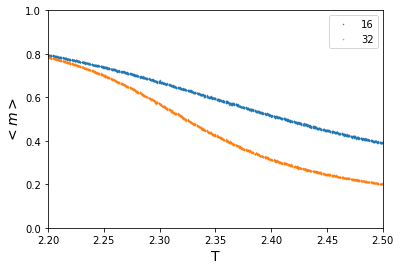

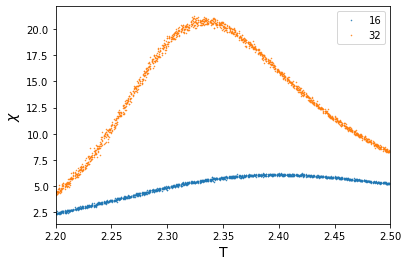

In [18]:
for i in range (cases):
    plt.plot(g[i].temperature, g[i].m, '.', markersize=1, label=16*(1+i))
plt.xlabel('T', fontsize=14)
plt.ylabel('$<m>$', fontsize=14)
plt.xlim(2.2, 2.5)
plt.ylim(0, 1)
plt.legend()
plt.show()
for i in range (cases):
    plt.plot(g[i].temperature, g[i].mag_sus, '.', markersize=1, label=16*(1+i))
plt.xlabel('T', fontsize=14)
plt.ylabel('$\chi$', fontsize=14)
plt.xlim(2.2, 2.5)
plt.legend()
plt.show()

In [19]:
gg=np.zeros((cases, 3,300))
ggerr=np.zeros((cases, 3, 300))
index=np.arange(300)
for i in range (cases):
    for j in range (300):
        gg[i][0][j]=np.average(g[i].temperature[j*5:j*5+5])
        gg[i][1][j]=np.average(g[i].m[j*5:j*5+5])
        gg[i][2][j]=np.average(g[i].mag_sus[j*5:j*5+5])
        ggerr[i][1][j]=np.std(g[i].m[j*5:j*5+5])
        ggerr[i][2][j]=np.std(g[i].mag_sus[j*5:j*5+5])

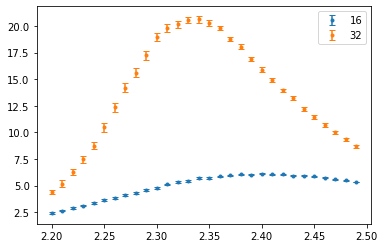

In [20]:
for i in range (cases):
    plt.errorbar(gg[i][0][index%10==0], gg[i][2][index%10==0], yerr=gerr.err_ms[0+300*i:300+300*i][index%10==0], 
                 marker=".", linestyle="", capsize=3, label=16*(1+i))
plt.legend()
plt.show()

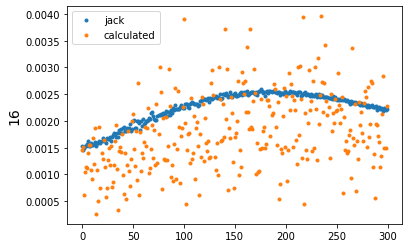

jack/calculated : 16 = 1.491425212767243


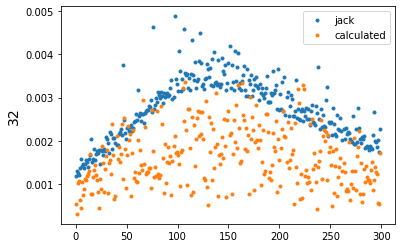

jack/calculated : 32 = 1.9565609869032474


In [22]:
y=np.zeros(300)
for i in range (cases):
    plt.plot(index, gerr.err_m[300*i:300*i+300], '.', label='jack')
    plt.plot(index, ggerr[i][1], '.', label='calculated')
    plt.ylabel(16*(1+i), fontsize=14)
    y=(gerr.err_m[300*i:300*i+300])/(ggerr[i][1])
    plt.legend()
    plt.show()
    print('jack/calculated :', 16*(1+i), '=', np.average(y))

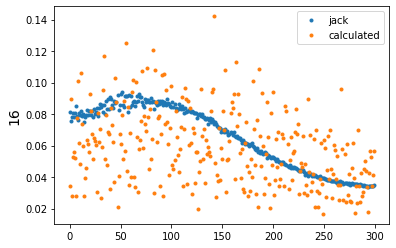

jack/calculated : 16 = 1.2827654639485497


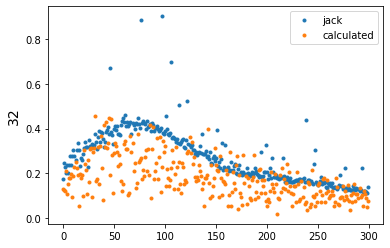

jack/calculated : 32 = 1.7983202740975168


In [24]:
y=np.zeros(300)
for i in range (cases):
    plt.plot(index, gerr.err_ms[300*i:300*i+300], '.', label='jack')
    plt.plot(index, ggerr[i][2], '.', label='calculated')
    plt.ylabel(16*(1+i), fontsize=14)
    y=(gerr.err_ms[300*i:300*i+300])/(ggerr[i][2])
    plt.legend()
    plt.show()
    print('jack/calculated :', 16*(1+i), '=', np.average(y))